<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercise/06_simple_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree: Iris Dataset

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Apply decision tree method to _iris_ dataset

## Load Dataset

In [11]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [7]:
iris = load_iris()
data = iris.data
target = iris.target
print(f"Feature shape: {data.shape}\nFeature names: {iris.feature_names}\n")
print(f"Target shape: {target.shape}\nTarget names: {iris.target_names}")

Feature shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']


## Create Input and Output  Matrices

In [8]:
# Use only two feature for this exercise
X_train = data[:, 2:] # 3rd and 4th columns correspond to 'petal length (cm)' and 'petal width (cm)'
y_train = target # there are 3 classes 0, 1, 2

## Define and Train Model

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Visualize Tree

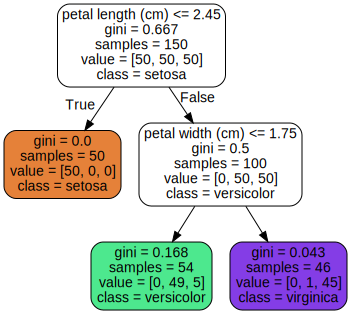

In [13]:
# Create and export .dot file
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True)

# Display .dot file
Source.from_file("iris_tree.dot")

## Gini Attribute
Gini attribute at node _i_, denoted as $G_i$, indicates the impurity of that node:

* 100% pure → gini=0
* 100% impure → gini=1

Here is how it is computed:

$$G_i = 1- \sum_{k=1}^{n}{p^2_{i,k}}$$

where $p_{i,k}$ is the ratio of the number of class $k$ instances to the total number of training instances in the $i^{th}$ node.



In [19]:
tree = tree_clf.tree_

for i in range(tree.node_count):
  if tree.children_left[i] == tree.children_right[i]:
    print(f"Node {i} is a leaf node")
  else:
    print(f"Node {i} is not a leaf node")

  print(f"Gini impurity: {tree.impurity[i]:.3f}")
  print(f"Samples: {tree.n_node_samples[i]}")
  print(f"Value: {tree.value[i]}\n")

Node 0 is not a leaf node
Gini impurity: 0.667
Samples: 150
Value: [[50. 50. 50.]]

Node 1 is a leaf node
Gini impurity: 0.000
Samples: 50
Value: [[50.  0.  0.]]

Node 2 is not a leaf node
Gini impurity: 0.500
Samples: 100
Value: [[ 0. 50. 50.]]

Node 3 is a leaf node
Gini impurity: 0.168
Samples: 54
Value: [[ 0. 49.  5.]]

Node 4 is a leaf node
Gini impurity: 0.043
Samples: 46
Value: [[ 0.  1. 45.]]



Let's manually compute the __Gini__ at the left node located at depth 2.

In [26]:
# Number of samples at this node
index = 3

samples = tree.n_node_samples[index] # 54
values = tree.value[index] # [[ 0. 49.  5.]]

gini = 1
for i in range(values.shape[1]):
  gini -= (values[0, i]/samples)**2

print(f"Gini impurity: {gini:.3f}")

Gini impurity: 0.168


## Train Deeper Tree

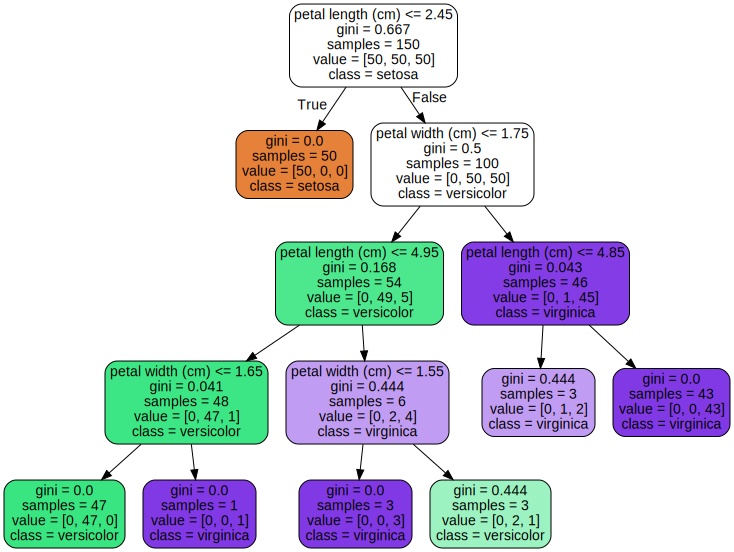

In [33]:
tree_clf1 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf1.fit(X_train, y_train)

# Create and export .dot file
export_graphviz(
        tree_clf1,
        out_file="iris_tree1.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True)

# Display .dot file
Source.from_file("iris_tree1.dot")